# Google Search Analytics

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the data from a CSV file
data = pd.read_csv('trends.csv')

# Explore the data
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset, such as column names and data types

  location  year         category  rank  query
0   Global  2001  Consumer Brands     1  Nokia
1   Global  2001  Consumer Brands     2   Sony
2   Global  2001  Consumer Brands     3    BMW
3   Global  2001  Consumer Brands     4   Palm
4   Global  2001  Consumer Brands     5  Adobe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB
None


In [4]:
# Perform data analysis
# Example 1: Get the total search volume by year
total_search_volume = data.groupby('year')['rank'].sum()
print(total_search_volume)

# Example 2: Get the top search queries by location
top_search_queries = data.groupby('location')['query'].value_counts().groupby(level=0).head(3)
print(top_search_queries)

year
2001     180
2002     330
2003     465
2004     435
2005      30
2006     225
2007     180
2008    2685
2009    1335
2010     270
2011    2670
2012    6675
2013    8670
2014    6960
2015    8370
2016    9120
2017    7830
2018    7680
2019    7815
2020    8940
Name: rank, dtype: int64
location   query                
Argentina  Cyber Monday             5
           Copa América             4
           Cómo saber dónde voto    3
Australia  Paul Walker              4
           Rugby World Cup          4
                                   ..
Vietnam    Gangnam Style            3
           Người Thừa Kế            3
Zimbabwe   Constantino Chiwenga     2
           Emmerson Mnangagwa       2
           Grace Mugabe             2
Name: query, Length: 249, dtype: int64


In [5]:
# 1. What were the top 5 most searched queries overall?
top_5_search_queries = data['query'].value_counts().head(5)
print("Top 5 most searched queries:")
print(top_5_search_queries)

Top 5 most searched queries:
Paul Walker        84
Donald Trump       83
Facebook           62
Robin Williams     61
Whitney Houston    56
Name: query, dtype: int64


In [6]:
# 2. Which year had the highest search volume?
yearly_search_volume = data.groupby('year')['rank'].sum()
year_with_highest_volume = yearly_search_volume.idxmax()
print("Year with the highest search volume:", year_with_highest_volume)

Year with the highest search volume: 2016


In [7]:
# 3. What were the top 3 search queries in each location?
top_3_queries_by_location = data.groupby('location')['query'].value_counts().groupby(level=0).head(3)
print("Top 3 search queries by location:")
print(top_3_queries_by_location)

Top 3 search queries by location:
location   query                
Argentina  Cyber Monday             5
           Copa América             4
           Cómo saber dónde voto    3
Australia  Paul Walker              4
           Rugby World Cup          4
                                   ..
Vietnam    Gangnam Style            3
           Người Thừa Kế            3
Zimbabwe   Constantino Chiwenga     2
           Emmerson Mnangagwa       2
           Grace Mugabe             2
Name: query, Length: 249, dtype: int64


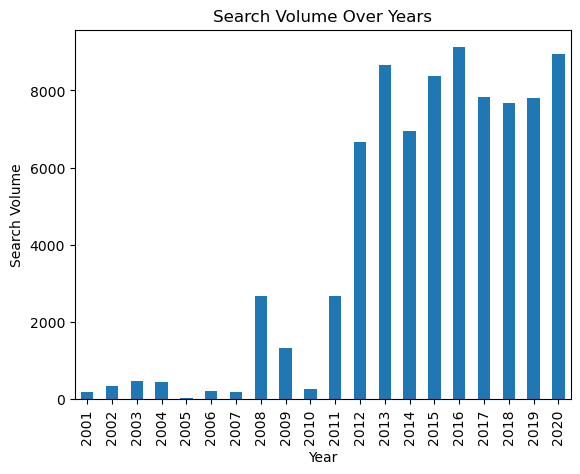

In [8]:
# 4. How did the search volume change over the years?
yearly_search_volume.plot(kind='bar', xlabel='Year', ylabel='Search Volume', title='Search Volume Over Years')
plt.show()

In [9]:
# 5. Which category had the highest average rank?
average_rank_by_category = data.groupby('category')['rank'].mean()
category_with_highest_rank = average_rank_by_category.idxmin()
print("Category with the highest average rank:", category_with_highest_rank)

Category with the highest average rank: "Cómo..."


In [10]:
# 6. What were the trending search queries in a specific location during a particular year?
specific_location = 'India'
specific_year = 2020
trending_queries = data[(data['location'] == specific_location) & (data['year'] == specific_year)]['query'].value_counts().head(5)
print("Trending search queries in", specific_location, "in", specific_year, ":")
print(trending_queries)

Trending search queries in India in 2020 :
Indian Premier League    3
Coronavirus              2
La Liga                  1
Joe Biden                1
Arnab Goswami            1
Name: query, dtype: int64


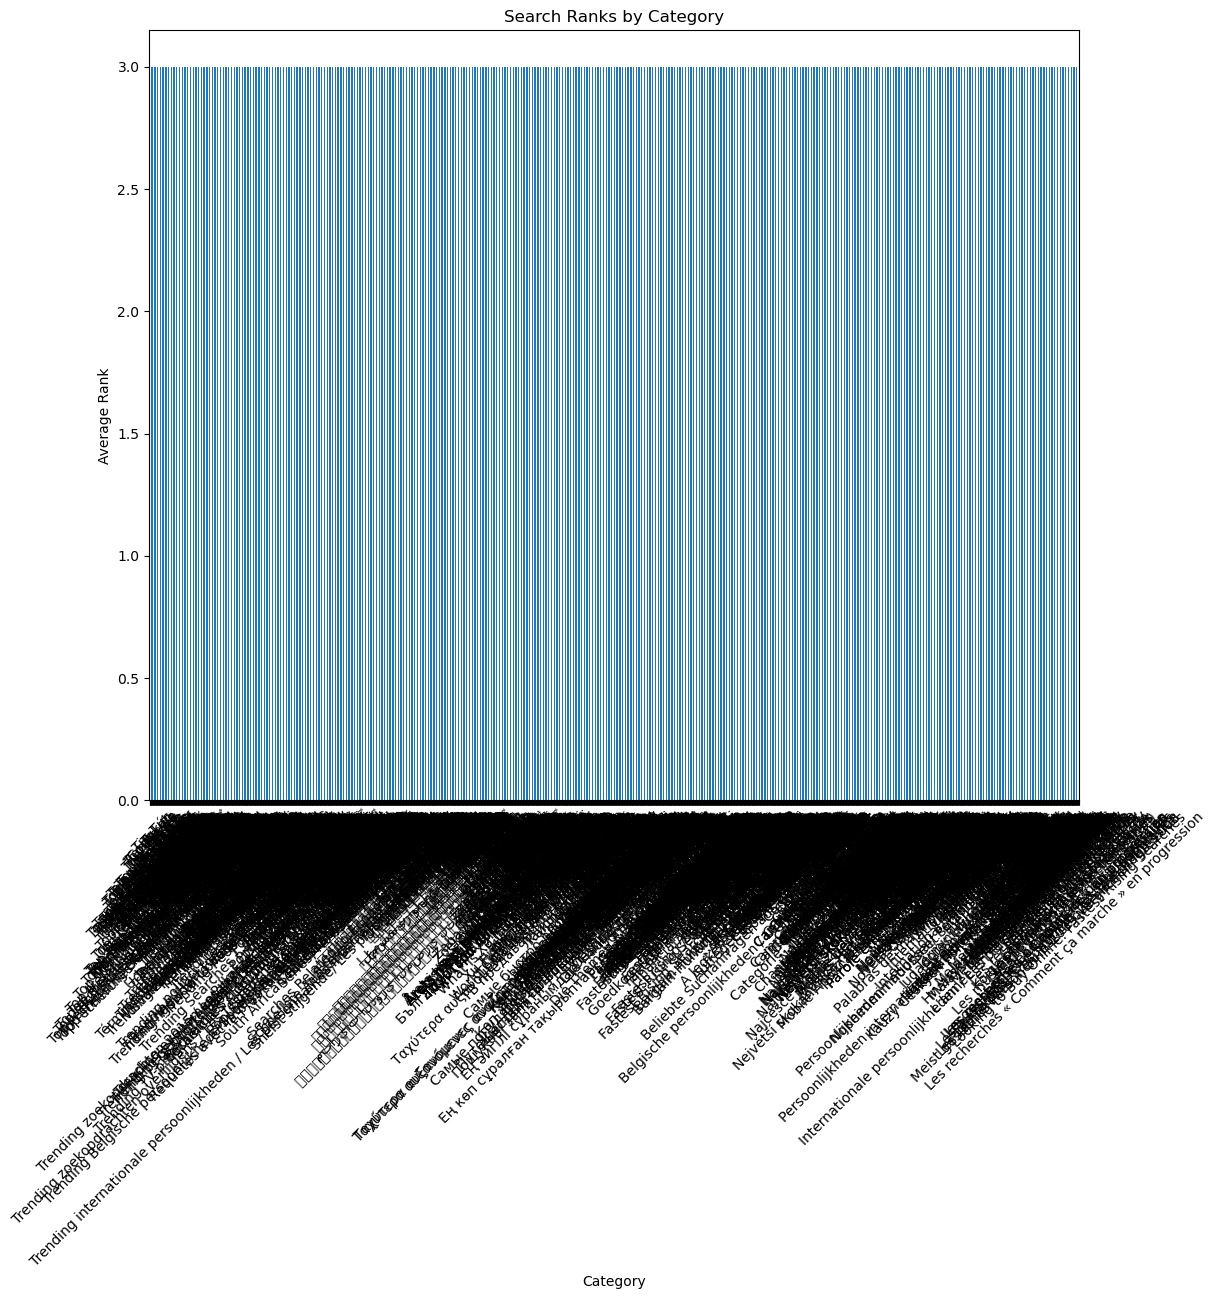

In [11]:
# #7 How did the search ranks differ across different categories?
#plt.figure(figsize=(12,10))
#rank_by_category = data.groupby('category')['rank'].mean().sort_values(ascending=False)
#rank_by_category.plot(kind='bar', xlabel='Category', ylabel='Average Rank', title='Search Ranks by Category')
#plt.xticks(rotation=45)
#plt.show()

In [14]:
#8 What were the least searched queries in each year?
least_searched_queries_by_year = data.groupby('year')['query'].value_counts().groupby(level=0).tail(1)
print("Least searched queries by year:")
print(least_searched_queries_by_year)

Least searched queries by year:
year  query          
2001  Xbox               1
2002  Zinedine Zidane    1
2003  Yu-Gi-Oh!          1
2004  iPod               1
2005  iPod Mini          1
2006  Zidane Jersey      1
2007  iPhone Lawsuit     1
2008  추성훈                1
2009  청담동 클럽 사진          1
2010  食べログ               1
2011  지나                 1
2012  후궁                 1
2013  혜민스님 책             1
2014  马航mh370            1
2015  헬로 카봇              1
2016  하이큐 3기             1
2017  홍준표                1
2018  하트시그널 2            1
2019  황하나                1
2020  테슬라 주가             1
Name: query, dtype: int64


In [15]:
#9 Which location had the highest search volume in a specific category?
specific_category = 'Technology'
location_with_highest_volume = data[data['category'] == specific_category].groupby('location')['rank'].sum().idxmax()
print("Location with the highest search volume in", specific_category, "category:", location_with_highest_volume)

Location with the highest search volume in Technology category: Canada


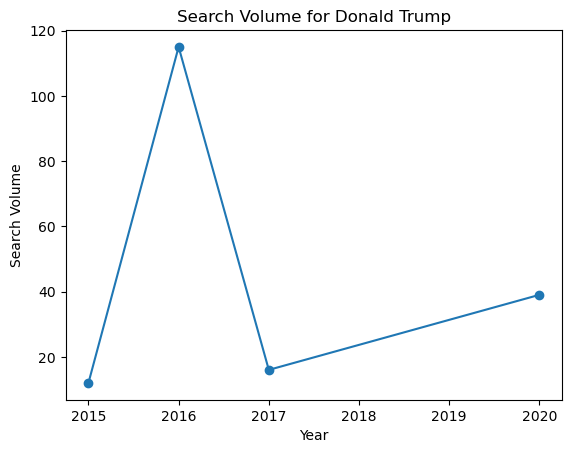

In [16]:
#10 Are there any specific queries that showed a significant increase or decrease in search volume over time?
specific_query = 'Donald Trump'
specific_query_volume = data[data['query'] == specific_query].groupby('year')['rank'].sum()
specific_query_volume.plot(kind='line', marker='o', xlabel='Year', ylabel='Search Volume', title='Search Volume for ' + specific_query)
plt.show()

In [17]:
# Is there a correlation between search ranks and the year?
correlation = data[['rank', 'year']].corr().iloc[0, 1]
print("Correlation between search ranks and the year:", correlation)

Correlation between search ranks and the year: -6.4067139630883214e-15


In [18]:
# Which year had the highest number of unique search queries?
year_with_highest_unique_queries = data.groupby('year')['query'].nunique().idxmax()
print("Year with the highest number of unique search queries:", year_with_highest_unique_queries)

Year with the highest number of unique search queries: 2016


In [19]:
# What were the top 5 search queries related to a specific category?
specific_category = 'Technology'
top_5_queries_by_category = data[data['category'] == specific_category]['query'].value_counts().head(5)
print("Top 5 search queries related to", specific_category, "category:")
print(top_5_queries_by_category)

Top 5 search queries related to Technology category:
MP3           2
Linux         2
Windows 10    2
Nexus 5       1
Nexus 5X      1
Name: query, dtype: int64


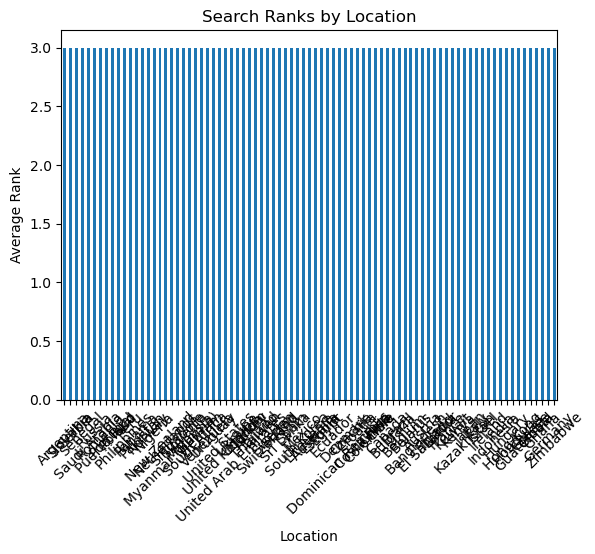

In [20]:
# Is there a relationship between search ranks and the location?
rank_by_location = data.groupby('location')['rank'].mean().sort_values(ascending=False)
rank_by_location.plot(kind='bar', xlabel='Location', ylabel='Average Rank', title='Search Ranks by Location')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Did any search queries experience a sudden spike in search volume at any point in time?
spike_threshold = 4  # Define a threshold for spike detection
spikes = data[data['rank'] > spike_threshold]['query'].value_counts()
print("Queries with sudden spike in search volume:")
pd.DataFrame(spikes)

Queries with sudden spike in search volume:


,query
iPhone 5s,9
Robin Williams,9
Adele,8
YouTube,8
Nelson Mandela,8
...,...
Qué es ébola,1
Contract Wars,1
Frozen,1
Asian Games 2014,1


In [24]:
# Which category had the most consistent search volume over the years?
consistent_volume_category = data.groupby('category')['rank'].std().idxmin()
print("Category with the most consistent search volume:", consistent_volume_category)

Category with the most consistent search volume: People


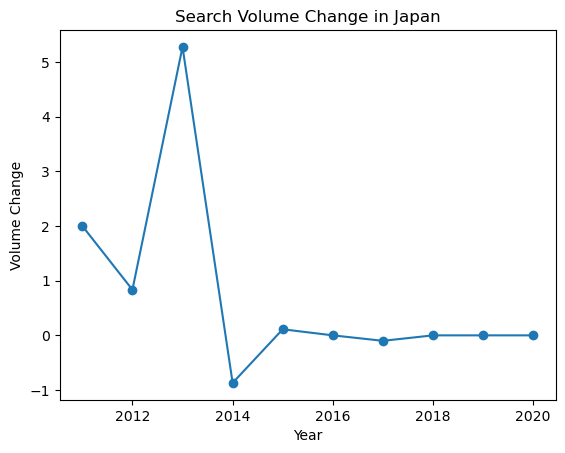

In [25]:
# Did any specific location show a significant increase or decrease in search volume over time?
specific_location ='Japan'
location_volume_change = data[data['location'] == specific_location].groupby('year')['rank'].sum().pct_change()
location_volume_change.plot(kind='line', marker='o', xlabel='Year', ylabel='Volume Change', title='Search Volume Change in ' + specific_location)
plt.show()

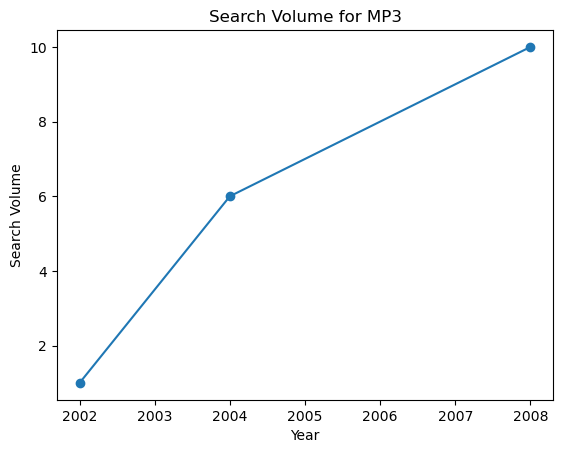

In [26]:
# How did the search volume for a specific query change across different years?
specific_query = 'MP3'
search_volume_by_year = data[data['query'] == specific_query].groupby('year')['rank'].sum()
search_volume_by_year.plot(kind='line', marker='o', xlabel='Year', ylabel='Search Volume', title='Search Volume for ' + specific_query)
plt.show()

In [27]:
# What were the top 10 search queries in a specific year and location?
specific_year = 2020
specific_location = 'Australia'
top_10_queries = data[(data['year'] == specific_year) & (data['location'] == specific_location)]['query'].value_counts().head(10)
print("Top 10 search queries in", specific_year, "and", specific_location + ":")
print(top_10_queries)

Top 10 search queries in 2020 and Australia:
US election             2
NBA                     2
Coronavirus             2
Boris Johnson           1
Champions League        1
State of Origin 2020    1
EPL                     1
Sean Connery            1
George Floyd            1
Chadwick Boseman        1
Name: query, dtype: int64


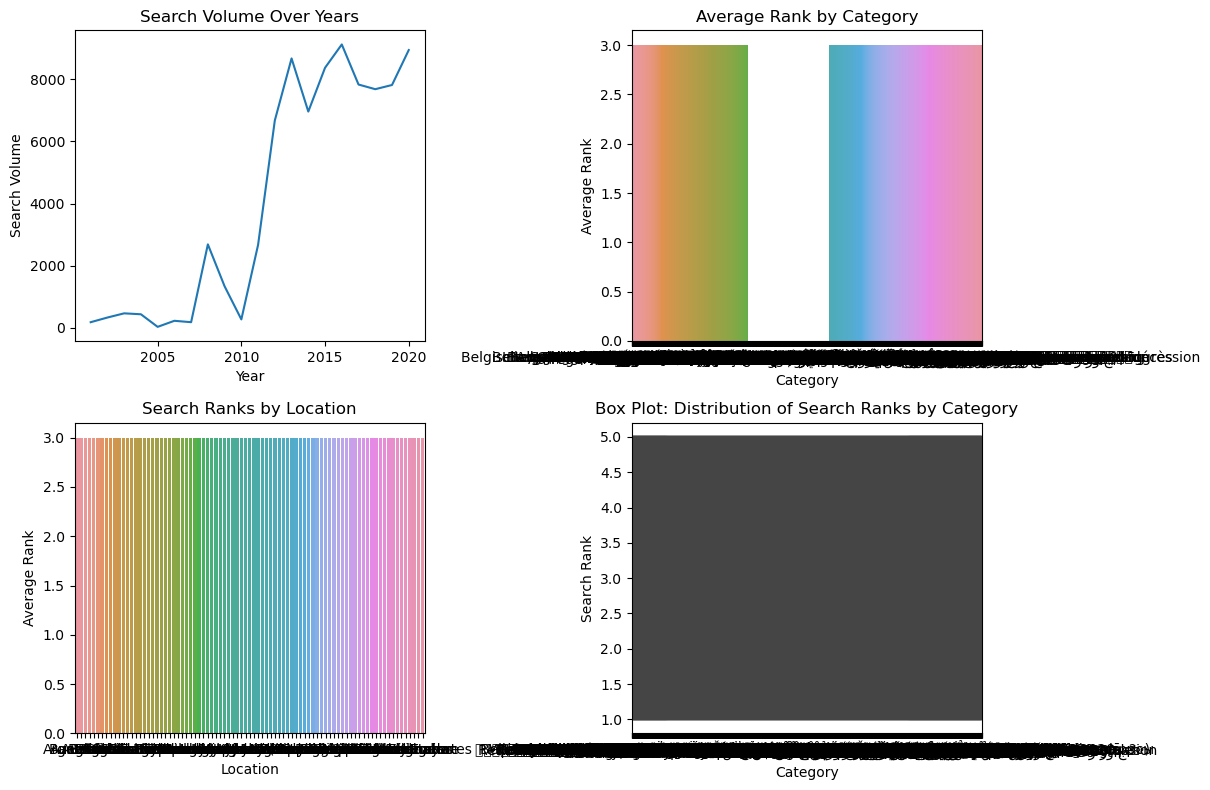

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' containing the required data

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 1. Search Volume Over Years - Line Chart
sns.lineplot(data=data.groupby('year')['rank'].sum(), ax=axes[0, 0])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Search Volume')
axes[0, 0].set_title('Search Volume Over Years')

# 2. Average Rank by Category - Bar Chart
sns.barplot(x=data.groupby('category')['rank'].mean().index, y=data.groupby('category')['rank'].mean().values, ax=axes[0, 1])
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Average Rank')
axes[0, 1].set_title('Average Rank by Category')

# 3. Search Ranks by Location - Bar Chart
sns.barplot(x=data.groupby('location')['rank'].mean().index, y=data.groupby('location')['rank'].mean().values, ax=axes[1, 0])
axes[1, 0].set_xlabel('Location')
axes[1, 0].set_ylabel('Average Rank')
axes[1, 0].set_title('Search Ranks by Location')

# 4. Box Plot: Distribution of Search Ranks by Category
sns.boxplot(x='category', y='rank', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Search Rank')
axes[1, 1].set_title('Box Plot: Distribution of Search Ranks by Category')

plt.tight_layout()
plt.show()